# CNN - Convolution Neural Networks

Uma convolução é uma operação aplicada em uma imagem (ou em um mapa de características) que usa um filtro (ou kernel) para extrair características específicas. A operação convolucional aplica o filtro na imagem e gera um mapa de características, que é uma nova imagem mostrando as respostas do filtro em cada posição.

## Convoluções

### Conv 1x1


Definição:
* Uma convolução 1x1 usa um filtro (ou kernel) que tem dimensões 1x1.

Propósito:
* Apesar de parecer trivial, convoluções 1x1 são extremamente úteis. Elas permitem mudanças na profundidade dos mapas de características sem alterar suas dimensões espaciais (altura e largura).
* Servem como uma forma eficiente de combinar informações de diferentes canais em um novo conjunto de canais, permitindo uma redução ou expansão dos canais.
* Podem ser usadas para criar não-linearidades adicionais quando seguidas por uma função de ativação (como ReLU).

Exemplo:
* Se você tem um mapa de características com 64 canais e aplica uma convolução 1x1 com 32 filtros, o resultado será um novo mapa de características com 32 canais, mas com a mesma altura e largura que o original.

**1. Exemplificando uma imagem de 5x5 pixels:**
```
1 2 3 4 5
6 7 8 9 1
2 3 4 5 6
7 8 9 1 2
3 4 5 6 7

```

**2. Um Kernel de 1x1**
```
0.5
```

**3. Multiplicando cada valor da imagem pelo kernel 1x1, obtem-se:**
```
0.5 1.0 1.5 2.0 2.5
3.0 3.5 4.0 4.5 0.5
1.0 1.5 2.0 2.5 3.0
3.5 4.0 4.5 0.5 1.0
1.5 2.0 2.5 3.0 3.5

```

### Conv 3x3

Definição:
* Uma convolução 3x3 usa um filtro de tamanho 3x3.

Propósito:
* Convoluções 3x3 são comuns porque conseguem capturar padrões espaciais locais, como bordas, cantos e texturas pequenas.
* São um bom compromisso entre complexidade computacional e a capacidade de capturar informações espaciais.
* Quando aplicadas em camadas profundas, ajudam a capturar relações entre características mais complexas.

Exemplo:
* Se você tem uma imagem ou um mapa de características, um filtro 3x3 é aplicado sobre ele movendo-se em passos (strides) definidos e computando a multiplicação e soma dos valores dos pixels dentro do filtro com os valores dos pesos do filtro.

**1. Exemplificando uma imagem de 5x5 pixels:**
```
1 2 3 4 5
6 7 8 9 1
2 3 4 5 6
7 8 9 1 2
3 4 5 6 7

```

**2. Um Kernel de 3x3**
```
1 0 -1
1 0 -1
1 0 -1

```

**3. Resultado da Convolução 3x3 (sem padding e stride de 1)**

O kernel se aplica sobre a área 3x3 da imagem e a soma ponderada dos valores é calculada.

```
Aplicando na primeira posição (topo-esquerda):
1*1 + 2*0 + 3*(-1) +
6*1 + 7*0 + 8*(-1) +
2*1 + 3*0 + 4*(-1) = -7

Resultado parcial:
-7  ...  ...

Deslocando o kernel para a direita:
2*1 + 3*0 + 4*(-1) +
7*1 + 8*0 + 9*(-1) +
3*1 + 4*0 + 5*(-1) = -7

Resultado parcial:
-7 -7  ...

Repetir esse processo para toda a imagem, obtendo:
-7 -7 -4 -4
 0  0  0  0
 1  1  4  4
 1  1  4  4
```

### Conv 5x5

Definição:
* Uma convolução 5x5 usa um filtro de tamanho 5x5.

Propósito:
* Convoluções 5x5 capturam padrões maiores e mais complexos do que convoluções 3x3, sendo capazes de considerar uma região maior da imagem ou mapa de características.
* São úteis para capturar informações contextuais mais amplas, como padrões mais dispersos.

Exemplo:
* Similar à convolução 3x3, um filtro 5x5 percorre a imagem ou mapa de características e realiza multiplicação e soma dos valores dos pixels dentro do filtro com os valores dos pesos do filtro.

**1. Exemplificando uma imagem de 5x5 pixels:**
```
1 2 3 4 5
6 7 8 9 1
2 3 4 5 6
7 8 9 1 2
3 4 5 6 7

```

**2. Um kernel de 5x5:**
```
 0  1  2  1  0
 1  2  3  2  1
 2  3  4  3  2
 1  2  3  2  1
 0  1  2  1  0
```

**3. Resultado da Convolução 5x5 (sem padding e stride de 1)**

Como a imagem e o kernel são do mesmo tamanho, aplicamos o kernel diretamente uma vez:

```
 1*0 + 2*1 + 3*2 + 4*1 + 5*0 +
 6*1 + 7*2 + 8*3 + 9*2 + 1*1 +
 2*2 + 3*3 + 4*4 + 5*3 + 6*2 +
 7*1 + 8*2 + 9*3 + 1*2 + 2*1 +
 3*0 + 4*1 + 5*2 + 6*1 + 7*0 = 160

Resultado final:
160
```

## Pooling

Pooling é uma operação que reduz a dimensionalidade espacial de um mapa de características, mantendo a informação mais importante. Existem diferentes tipos de pooling, sendo os mais comuns:

* Max Pooling: Seleciona o valor máximo de cada região (janela) da imagem.
* Average Pooling: Calcula a média dos valores de cada região (janela) da imagem.

## Projeção

Projeção, no contexto de CNNs e Inception, geralmente se refere a aplicar uma convolução 1x1 após a operação de pooling. A convolução 1x1 modifica a profundidade do mapa de características, ajustando o número de canais.

## Pooling com Projeção

No módulo de Inception, pooling com projeção é uma combinação de uma operação de pooling seguida por uma convolução 1x1. Essa combinação é usada para:

1. Reduzir a Dimensionalidade Espacial: A operação de pooling reduz a altura e a largura do mapa de características, diminuindo a quantidade de informações espaciais, mas mantendo a informação mais relevante.
2. Manter a Profundidade Controlada: A convolução 1x1 após o pooling ajusta a profundidade do mapa de características, permitindo a combinação eficiente de diferentes tipos de informações extraídas pelas outras convoluções (1x1, 3x3 e 5x5) no módulo de Inception.

### Exemplo Prático

Vamos considerar um exemplo prático usando pooling com projeção em um módulo de Inception.

Entrada
* Mapa de características de entrada: Suponha que temos um mapa de características de tamanho 8x8x64 (altura x largura x canais).

Pooling
* Max Pooling: Usamos uma janela 3x3 com stride 1 e padding 'same'.
O resultado é um mapa de características de tamanho 8x8x64, pois o padding 'same' mantém as dimensões espaciais.

Projeção
* Convolução 1x1: Aplicamos uma convolução 1x1 com, digamos, 32 filtros.
Isso ajusta a profundidade do mapa de características para 32, resultando em um mapa de características de tamanho 8x8x32.

Combinação no Módulo de Inception
* No módulo de Inception, essa operação de pooling com projeção é combinada com as outras convoluções (1x1, 3x3, 5x5) e suas respectivas projeções.

## OBS

>Lembre-se que os canais de cores são combinados (somados) ao final da primeira camada de convulção, logo, uma imagem 5x5x3 ao passar por um filtro 3x3x3, se torna um combinação 2D de apenas 3x3.

>A mesma lógica é mantida para novas camadas de convulção, caso o resultado de um pooling seja 8 mapas de ativação 3x3, a nova camada de convulção realizara o produto escalar e em seguida irá combinar o valor de mapas, repetindo este processo pelo novo número de features informado.

>Este processo de chama **soma em profundiade**, esta combinação de mapas de ativação é o que torna o modelo capaz de progressivamente entender caracteristicas mais completas de imagens, por exemplo:

```
[Imagem RGB 32x32x3]
        │
   Conv2D 32 filtros 3x3
        │
  [32 mapas 32x32] ← bordas, cores, cantos
        │
   MaxPooling 2x2
        │
  [32 mapas 16x16] ← padrões mais fortes
        │
   Conv2D 64 filtros 3x3
        │
  [64 mapas 14x14] ← mapas de ativaçao|padrões combinados (olhos, orelha e etc)
        │
   MaxPooling 2x2
        │
  [64 mapas 7x7] ← padrões hierárquicos fortes
```



# Implementação da CNN GoogLeNet Inception v1

Utilizaremos um exemplo desenvolvido pelo Google Brain para visão computacional, denominado Inception.

## Bibliotecas a serem utilizadas

In [ ]:
# Importação das bibliotecas necessárias
import tensorflow as tf
from tensorflow.keras.layers import Layer, Conv2D, MaxPooling2D, Dropout, Dense, Input, concatenate, GlobalAveragePooling2D, AveragePooling2D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.callbacks import LearningRateScheduler
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import requests
from PIL import Image
from io import BytesIO

In [ ]:
# Verifica a quantidade de GPUs disponíveis
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


## Database

`Função load_cifar10_data:` Essa função é responsável por carregar os dados do dataset CIFAR-10 e realizar o pré-processamento necessário, como redimensionar as imagens, transformar os rótulos para um formato categórico e normalizar os valores dos pixels das imagens.

`Parâmetros 32, 32:` Esses parâmetros são usados para especificar as dimensões das imagens após o redimensionamento. No caso, 32 e 32 representam a largura e a altura das imagens, respectivamente. Ou seja, cada imagem do CIFAR-10 será redimensionada para 32x32 pixels.

In [ ]:
# Função para carregar e processar os dados do CIFAR-10
def load_cifar10_data(img_rows, img_cols):
    # Carrega os dados de treino e validação do CIFAR-10
    (X_train, Y_train), (X_valid, Y_valid) = cifar10.load_data()

    # Redimensiona as imagens de treino e validação
    X_train = np.array([cv2.resize(img, (img_rows, img_cols)) for img in X_train])
    X_valid = np.array([cv2.resize(img, (img_rows, img_cols)) for img in X_valid])

    # Converte os rótulos para o formato categórico
    num_classes = 10
    Y_train = to_categorical(Y_train, num_classes)
    Y_valid = to_categorical(Y_valid, num_classes)

    # Converte as imagens para o tipo 'float32' e normaliza os dados
    X_train = X_train.astype('float32') / 255.0
    X_valid = X_valid.astype('float32') / 255.0

    return X_train, Y_train, X_valid, Y_valid

In [ ]:
# Carrega e pré-processa os dados do CIFAR-10, alterando o tamanho da imagem para 32x32 pixels
X_train, y_train, X_test, y_test = load_cifar10_data(32, 32)

170498071/170498071 [==============================] - 4s 0us/step


`kernel_init:` Este inicializador é usado para definir os valores iniciais dos pesos das camadas convolucionais usando o método Glorot Uniform. Ele ajuda a garantir que as ativações não sejam nem muito grandes nem muito pequenas, facilitando o treinamento eficiente da rede.

*   `tf.keras.initializers.GlorotUniform()`
    * Este é um inicializador de pesos que também é conhecido como Xavier Uniform Initializer.
    * Ele é projetado para manter a variação das ativações através das camadas da rede constante.
    * Funciona inicializando os pesos com valores aleatórios retirados de uma distribuição uniforme dentro de um intervalo específico, que depende do número de unidades nas camadas de entrada e saída.
    * Este método é amplamente utilizado porque ajuda a acelerar a convergência do modelo.
*   `tf.keras.initializers.Constant(value=0.2)`
    * Este é um inicializador de bias que define todos os valores de bias para um valor constante, neste caso, 0.2.
    * Inicializar os bias com um valor constante pode ser útil, especialmente para evitar iniciar com todos os bias iguais a zero, o que pode causar certas simetrias que são indesejáveis no treinamento inicial da rede.


`bias_init:` Este inicializador define os valores iniciais dos bias das camadas convolucionais como 0.2, fornecendo um valor constante diferente de zero para os bias, o que pode ajudar a quebrar a simetria e permitir que a rede aprenda de forma mais eficiente desde o início.

In [ ]:
# Inicializadores de kernel (pesos iniciais) e bias
kernel_init = tf.keras.initializers.GlorotUniform()
bias_init = tf.keras.initializers.Constant(value=0.2)

## Inception Module

A função inception_module recebe como entrada:

* `x`: o tensor de entrada (normalmente uma camada anterior).
* `filters_1x1`: o número de filtros para a convolução 1x1.
* `filters_3x3_reduce`: o número de filtros para a camada de redução antes da convolução 3x3.
* `filters_3x3`: o número de filtros para a convolução 3x3.
* `filters_5x5_reduce`: o número de filtros para a camada de redução antes da convolução 5x5.
* `filters_5x5`: o número de filtros para a convolução 5x5.
* `filters_pool_proj`: o número de filtros para a projeção após a camada de pooling.
name: opcional, o nome do módulo de Inception.

### Convolução 1x1

* `Conv2D`: Cria uma camada de convolução bidimensional.
* `filters_1x1`: Número de filtros usados na convolução 1x1.
* `(1, 1)`: Tamanho do kernel (filtro) é 1x1.
* `padding='same'`: A saída tem o mesmo tamanho que a entrada, adicionando zeros nas bordas quando necessário.
* `activation='relu'`: Função de ativação ReLU (Rectified Linear Unit). M ais funções de ativação na [documentação do tensorflow](https://www.tensorflow.org/api_docs/python/tf/keras/activations)
* `kernel_initializer`: Inicializador para os pesos da camada, aqui usando kernel_init.
* `bias_initializer`: Inicializador para os biases da camada, aqui usando bias_init.
`(x)`: A camada recebe o tensor de entrada x

### Convolução 3x3 com redução

* `conv_3x3_reduce`: Primeira camada é uma convolução 1x1 para reduzir a dimensionalidade.
* `filters_3x3_reduce`: Número de filtros para a camada de redução.
* `(1, 1)`: Tamanho do kernel é 1x1.
* `conv_3x3`: Segunda camada é uma convolução 3x3 aplicada na saída da camada anterior.
* `filters_3x3`: Número de filtros para a convolução 3x3.
* `(3, 3)`: Tamanho do kernel é 3x3.

### Convolução 5x5 com redução

* `conv_5x5_reduce`: Primeira camada é uma convolução 1x1 para reduzir a dimensionalidade.
* `filters_5x5_reduce`: Número de filtros para a camada de redução.
* `(1, 1)`: Tamanho do kernel é 1x1.
* `conv_5x5`: Segunda camada é uma convolução 5x5 aplicada na saída da camada anterior.
* `filters_5x5`: Número de filtros para a convolução 5x5.
* `(5, 5)`: Tamanho do kernel é 5x5.

### Pooling com projeção

```
pool_proj = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
```

* `MaxPooling2D`: Cria uma camada de max pooling.
* `(3, 3)`: Tamanho da janela de pooling (3x3 pixels).
* `strides=(1, 1)`: Passo da janela de pooling (move-se 1 pixel de cada vez).
* `padding='same'`: Mantém as dimensões espaciais da entrada, adicionando zeros quando necessário.
* `(x)`: Aplica a operação ao tensor de entrada x.

```
pool_proj = Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(pool_proj)

```

* `Conv2D`: Cria uma camada de convolução.
* `filters_pool_proj`: Número de filtros para a convolução 1x1 (determina a profundidade do mapa de características de saída).
* `(1, 1)`: Tamanho do kernel (filtro) é 1x1.
* `padding='same'`: Mantém as dimensões espaciais da entrada.
* `activation='relu'`: Função de ativação ReLU (Rectified Linear Unit).
* `kernel_initializer` e `bias_initializer`: Inicializadores dos pesos e biases.
* `(pool_proj)`: Aplica a convolução ao mapa de características resultante da operação de pooling.


In [ ]:
# Função para criar um módulo de Inception
def inception_module(x, filters_1x1, filters_3x3_reduce, filters_3x3, filters_5x5_reduce, filters_5x5, filters_pool_proj, name=None):
    conv_1x1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)

    conv_3x3 = Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_3x3 = Conv2D(filters_3x3, (3, 3), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_3x3)

    conv_5x5 = Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_5x5 = Conv2D(filters_5x5, (5, 5), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_5x5)

    pool_proj = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(pool_proj)

    output = concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3, name=name)
    return output

## Definição do Modelo de Inception

**Resumo do Fluxo de Camadas**

1. Camada de Entrada: Recebe imagens de 32x32 pixels com 3 canais (RGB).
2. Convolução 7x7: Aplica 64 filtros 7x7 com stride 2, reduzindo a dimensão espacial e extraindo características iniciais.
3. Max Pooling 3x3: Reduz ainda mais a dimensão espacial com janela 3x3 e stride 2.
4. Convolução 1x1: Modifica a profundidade para 64, mantendo a dimensão espacial.
5. Convolução 3x3: Aplica 192 filtros 3x3 para extrair características mais complexas.
6. Max Pooling 3x3: Reduz novamente a dimensão espacial com janela 3x3 e stride 2.

In [ ]:
input_layer = Input(shape=(32, 32, 3))

* `Input`: Cria uma camada de entrada que especifica a forma da entrada.
* `shape=(32, 32, 3)`: As entradas são imagens de 32x32 pixels com 3 canais (RGB).

In [ ]:
x = Conv2D(64, (7, 7), padding='same', strides=(2, 2), activation='relu', name='conv_1_7x7div2', kernel_initializer=kernel_init, bias_initializer=bias_init)(input_layer)

* `Conv2D`: Cria uma camada de convolução bidimensional.
64: Número de filtros na convolução.
* `(7, 7)`: Tamanho do kernel (filtro) é 7x7.
* `padding='same'`: A saída tem o mesmo tamanho que a entrada, com preenchimento de zeros nas bordas quando necessário.
* `strides=(2, 2)`: O kernel se move 2 pixels de cada vez na horizontal e na vertical, reduzindo as dimensões espaciais da saída.
* `activation='relu'`: Função de ativação ReLU (Rectified Linear Unit).
* `name='conv_1_7x7div2'`: Nome da camada.
* `kernel_initializer=kernel_init`: Inicializador para os pesos da camada.
* `bias_initializer=bias_init`: Inicializador para os bias da camada.
* `(input_layer)`: Aplica a convolução ao tensor de entrada input_layer

In [ ]:
x = MaxPooling2D((3, 3), padding='same', strides=(2, 2), name='max_pool_1_3x3div2')(x)

* `MaxPooling2D`: Cria uma camada de pooling máximo bidimensional.
* `(3, 3)`: Tamanho da janela de pooling é 3x3.
* `padding='same'`: A saída tem o mesmo tamanho que a entrada, com preenchimento de zeros nas bordas quando necessário.
* `strides=(2, 2)`: A janela de pooling se move 2 pixels de cada vez, reduzindo as dimensões espaciais da saída.
* `name='max_pool_1_3x3div2'`: Nome da camada.
* `(x)`: Aplica a operação de pooling ao tensor `x` resultante da camada anterior.

In [ ]:
x = Conv2D(64, (1, 1), padding='same', activation='relu', name='conv_2a_3x3div1')(x)

* `Conv2D`: Cria outra camada de convolução bidimensional.
* `64`: Número de filtros na convolução.
* `(1, 1)`: Tamanho do kernel é 1x1, usado para modificar a profundidade do tensor sem alterar as dimensões espaciais.
* `padding='same'`: A saída tem o mesmo tamanho que a entrada.
* `activation='relu'`: Função de ativação ReLU.
* `name='conv_2a_3x3div1'`: Nome da camada.
* `kernel_initializer=kernel_init`: Inicializador para os pesos da camada.
* `bias_initializer=bias_init`: Inicializador para os bias da camada.
* `(x)`: Aplica a convolução ao tensor `x` resultante da camada anterior.

In [ ]:
x = Conv2D(192, (3, 3), padding='same', activation='relu', name='conv_2b_3x3div1')(x)

* `Conv2D`: Cria outra camada de convolução bidimensional.
* `192`: Número de filtros na convolução.
* `(1, 1)`: Tamanho do kernel é 1x1, usado para modificar a profundidade do tensor sem alterar as dimensões espaciais.
* `padding='same'`: A saída tem o mesmo tamanho que a entrada.
* `activation='relu'`: Função de ativação ReLU.
* `name='conv_2b_3x3div1'`: Nome da camada.
* `kernel_initializer=kernel_init`: Inicializador para os pesos da camada.
* `bias_initializer=bias_init`: Inicializador para os bias da camada.
* `(x)`: Aplica a convolução ao tensor `x` resultante da camada anterior.

In [ ]:
x = MaxPooling2D((3, 3), padding='same', strides=(2, 2), name='max_pool_2_3x3div2')(x)

* `MaxPooling2D`: Cria uma camada de pooling máximo bidimensional.
* `(3, 3)`: Tamanho da janela de pooling é 3x3.
* `padding='same'`: A saída tem o mesmo tamanho que a entrada, com preenchimento de zeros nas bordas quando necessário.
* `strides=(2, 2)`: A janela de pooling se move 2 pixels de cada vez, reduzindo as dimensões espaciais da saída.
* `name='max_pool_2_3x3div2'`: Nome da camada.
* `(x)`: Aplica a operação de pooling ao tensor `x` resultante da camada anterior.

## Adição de módulos de Inception (x)

Após o processamento do modelo de Inception, a saída resultante torna-se entrada a ser passada por módulos de Inception, que combinarão várias operações de convolução e pooling em paralelo para extrair características em diferentes escalas.

**Resumo do Processo**

1. Primeiro Módulo de Inception:

    * Aplica várias convoluções (1x1, 3x3 com redução, 5x5 com redução) e pooling seguido de uma projeção (convolução 1x1).
    * Combina as saídas dessas operações em um único tensor.

2. Segundo Módulo de Inception:

    * Aplica um conjunto diferente de convoluções e pooling, mas com a mesma estrutura.
    * Combina as saídas dessas operações em um único tensor.

3. Pooling Máximo:

    * Reduz as dimensões espaciais do tensor de saída resultante dos módulos de Inception.
    * Mantém a profundidade do tensor, mas reduz a resolução espacial, o que ajuda a capturar características mais abstratas e reduzir a complexidade computacional para as camadas subsequentes.

Esses passos são parte da construção do modelo de Inception, onde diferentes escalas de convoluções e pooling são usadas para extrair características complexas e variadas da entrada, seguidos por operações de pooling para compactar e resumir a informação.

### Primeiro módulo Inception

In [ ]:
x = inception_module(x, filters_1x1=64, filters_3x3_reduce=96, filters_3x3=128, filters_5x5_reduce=16, filters_5x5=32, filters_pool_proj=32, name='inception_3a')

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Primeiro módulo de Inception é adicionado ao modelo:

1. `inception_module`: Chama a função inception_module para criar e aplicar um módulo de Inception à entrada `x`.
2. `filters_1x1=64`: Define 64 filtros para a convolução 1x1.
3. `filters_3x3_reduce=96`: Define 96 filtros para a camada de redução antes da convolução 3x3.
4. `filters_3x3=128`: Define 128 filtros para a convolução 3x3.
5. `filters_5x5_reduce=16`: Define 16 filtros para a camada de redução antes da convolução 5x5.
6. `filters_5x5=32`: Define 32 filtros para a convolução 5x5.
7. `filters_pool_proj=32`: Define 32 filtros para a projeção após a camada de pooling.
8. `name='inception_3a'`: Define o nome do módulo como `inception_3a`.


Esses parâmetros configuram o módulo de Inception para combinar múltiplas convoluções (1x1, 3x3, 5x5) e pooling em paralelo, concatenando suas saídas.

### Segundo módulo Inception

In [ ]:
x = inception_module(x, filters_1x1=128, filters_3x3_reduce=128, filters_3x3=192, filters_5x5_reduce=32, filters_5x5=96, filters_pool_proj=64, name='inception_3b')

Segundo módulo de Inception com diferentes configurações de filtros:

1. `filters_1x1=128`: Define 128 filtros para a convolução 1x1.
2. `filters_3x3_reduce=128`: Define 128 filtros para a camada de redução antes da convolução 3x3.
3. `filters_3x3=192`: Define 192 filtros para a convolução 3x3.
4. `filters_5x5_reduce=32`: Define 32 filtros para a camada de redução antes da convolução 5x5.
5. `filters_5x5=96`: Define 96 filtros para a convolução 5x5.
6. `filters_pool_proj=64`: Define 64 filtros para a projeção após a camada de pooling.
7. `name='inception_3b'`: Define o nome do módulo como `inception_3b`.

Este módulo de Inception, assim como o primeiro, combina várias convoluções e pooling para extrair características em diferentes escalas.

### MaxPooling dos dois primeiros módulos

In [ ]:
x = MaxPooling2D((3, 3), padding='same', strides=(2, 2), name='max_pool_3_3x3div2')(x)

Após os módulos de Inception, uma camada de pooling máximo é aplicada:

1. `MaxPooling2D`: Cria uma camada de pooling máximo bidimensional.
2. `(3, 3)`: Tamanho da janela de pooling é 3x3.
3. `padding='same'`: Mantém as dimensões espaciais da saída iguais às da entrada, adicionando zeros nas bordas quando necessário.
4. `strides=(2, 2)`: A janela de pooling se move 2 pixels de cada vez na horizontal e na vertical, reduzindo as dimensões espaciais da saída.
5. `name='max_pool_3_3x3div2'`: Nome da camada é `max_pool_3_3x3div2`.
6. `(x)`: Aplica a operação de pooling ao tensor `x` resultante dos módulos de Inception anteriores.

## Classificadores auxiliares (x1)

Este trecho de código implementa um classificador auxiliar, que é uma saída adicional na rede Inception. Esse classificador auxiliar ajuda no treinamento, fornecendo gradientes adicionais para camadas intermediárias, o que pode facilitar a convergência e mitigar o problema de gradientes desvanecentes.

**Propósito do Classificador Auxiliar**

O classificador auxiliar ajuda a rede a aprender melhor ao adicionar uma perda auxiliar durante o treinamento. Isso proporciona gradientes adicionais às camadas intermediárias, ajudando a evitar o problema de gradientes desvanecentes e acelerando a convergência da rede profunda. Durante a inferência, essa saída auxiliar pode ser ignorada, e apenas a saída principal da rede é usada para fazer previsões.

**Resumo do Processo**

1. `AveragePooling2D`: Reduz a resolução espacial pela metade com uma janela de 3x3 e stride de 2.
2. `Conv2D 1x1`: Ajusta a profundidade do tensor para 128 canais.
3. `Flatten`: Achata o tensor 4D (altura, largura, canais) em um vetor 1D.
4. `Dense 1024`: Aplica uma camada totalmente conectada com 1024 neurônios e ativação ReLU.
5. `Dropout`: Aplica dropout com uma taxa de 70% para evitar overfitting.
6. `Dense 10`: Aplica a camada de saída com 10 neurônios e ativação softmax, produzindo a distribuição de probabilidade sobre as 10 classes do CIFAR-10.

In [ ]:
x1 = AveragePooling2D((3, 3), strides=2, padding='same')(x)

* `AveragePooling2D`: Aplica uma camada de pooling médio bidimensional.
* `(3, 3)`: Tamanho da janela de pooling é 3x3.
* `strides=2`: A janela de pooling se move 2 pixels de cada vez, reduzindo a resolução espacial pela metade.
* `padding='same'`: A saída tem o mesmo tamanho que a entrada, com preenchimento de zeros nas bordas quando necessário.
* `(x)`: Aplica a operação de pooling ao tensor x resultante das camadas anteriores.

In [ ]:
x1 = Conv2D(128, (1, 1), padding='same', activation='relu')(x1)

* `Conv2D`: Aplica uma camada de convolução bidimensional.
* `128`: Número de filtros na convolução.
* `(1, 1)`: Tamanho do kernel é 1x1, usado para modificar a profundidade do tensor sem alterar as dimensões espaciais.
* `padding='same'`: Mantém as dimensões espaciais da entrada.
* `activation='relu'`: Função de ativação ReLU.
* `(x1)`: Aplica a convolução ao tensor `x1` resultante da camada de pooling médio.

In [ ]:
x1 = Flatten()(x1)

* `Flatten`: Achata o tensor de entrada em uma única dimensão (vetor), preparando-o para ser passado para uma camada totalmente conectada (densa).

In [ ]:
x1 = Dense(2048, activation='relu')(x1)

* `Dense`: Aplica uma camada totalmente conectada (densa).
* `1024`: Número de neurônios na camada densa.
* `activation='relu'`: Função de ativação ReLU.
* `(x1)`: Aplica a camada densa ao tensor achatado.

In [ ]:
x1 = Dropout(0.2)(x1)

* `Dropout`: Aplica uma camada de dropout, que desativa aleatoriamente 70% dos neurônios durante o treinamento para evitar overfitting.
* `0.7`: Taxa de dropout (70% dos neurônios são desativados aleatoriamente).
* `(x1)`: Aplica a camada de dropout ao tensor resultante da camada densa.

In [ ]:
x1 = Dense(10, activation='softmax', name='auxilliary_output_1')(x1)

* `Dense`: Aplica outra camada totalmente conectada (densa).
* `10`: Número de neurônios na camada de saída, correspondente ao número de classes no CIFAR-10.
* `activation='softmax'`: Função de ativação softmax, que converte os valores dos neurônios em probabilidades.
* `name='auxilliary_output_1'`: Nome da camada de saída auxiliar.
* `(x1)`: Aplica a camada densa ao tensor resultante da camada de dropout

## Mais módulos de Inception e o classificador final

Este trecho de código define a parte final da rede Inception, onde as características extraídas são compactadas e transformadas em previsões de classe através de uma camada totalmente conectada com softmax.

**Resumo do Processo**

1. Módulos de Inception (5a e 5b):

    * Cada módulo de Inception combina várias convoluções (1x1, 3x3 com redução, 5x5 com redução) e pooling seguido de uma projeção (convolução 1x1).
    * As saídas dessas operações são concatenadas para formar um único tensor de saída.

2. Global Average Pooling:

    * Reduz cada mapa de características a um único valor (a média), resultando em um vetor de saída com uma dimensão por canal.
    * Prepara os dados para a camada densa final, reduzindo drasticamente a dimensionalidade.

3. Dropout:

    * Aplica uma taxa de dropout de 40% para evitar overfitting, desativando aleatoriamente neurônios durante o treinamento.

4. Camada Densa Final:

    * Aplica uma camada densa com 10 neurônios e ativação softmax para produzir a distribuição de probabilidade sobre as 10 classes do CIFAR-10.

### Terceiro Módulo Inception

In [ ]:
x = inception_module(x, filters_1x1=256, filters_3x3_reduce=160, filters_3x3=320, filters_5x5_reduce=32, filters_5x5=128, filters_pool_proj=128, name='inception_5a')


* `inception_module`: Chama a função inception_module para criar e aplicar um módulo de Inception à entrada `x`.
* `filters_1x1=256`: Define 256 filtros para a convolução 1x1.
* `filters_3x3_reduce=160`: Define 160 filtros para a camada de redução antes da convolução 3x3.
* `filters_3x3=320`: Define 320 filtros para a convolução 3x3.
* `filters_5x5_reduce=32`: Define 32 filtros para a camada de redução antes da convolução 5x5.
* `filters_5x5=128`: Define 128 filtros para a convolução 5x5.
* `filters_pool_proj=128`: Define 128 filtros para a projeção após a camada de pooling.
* `name='inception_5a'`: Define o nome do módulo como `'inception_5a'`.

Este módulo de Inception combina várias convoluções (1x1, 3x3 com redução, 5x5 com redução) e pooling seguido de uma projeção (convolução 1x1), concatenando suas saídas.

### Quarto Módulo Inception

In [ ]:
x = inception_module(x, filters_1x1=384, filters_3x3_reduce=192, filters_3x3=384, filters_5x5_reduce=48, filters_5x5=128, filters_pool_proj=128, name='inception_5b')

* `filters_1x1=384`: Define 384 filtros para a convolução 1x1.
* `filters_3x3_reduce=192`: Define 192 filtros para a camada de redução antes da convolução 3x3.
* `filters_3x3=384`: Define 384 filtros para a convolução 3x3.
* `filters_5x5_reduce=48`: Define 48 filtros para a camada de redução antes da convolução 5x5.
* `filters_5x5=128`: Define 128 filtros para a convolução 5x5.
* `filters_pool_proj=128`: Define 128 filtros para a projeção após a camada de pooling.
* `name='inception_5b'`: Define o nome do módulo como `'inception_5b'`.

Assim como os módulos anteriores, este módulo de Inception combina várias convoluções e pooling para extrair características em diferentes escalas.

### Global average pooling

In [ ]:
x = GlobalAveragePooling2D(name='avg_pool_5_3x3/1')(x)

* `GlobalAveragePooling2D`: Aplica uma operação de pooling médio global.
Em vez de usar uma janela deslizante, essa camada calcula a média de cada mapa de características inteiro.
* `name='avg_pool_5_3x3/1'`: Nome da camada.
* `(x)`: Aplica a operação de pooling ao tensor x resultante do módulo de Inception anterior.

A operação de pooling médio global reduz cada mapa de características a um único valor (a média), resultando em um vetor de saída com uma dimensão por canal. Isso ajuda a reduzir drasticamente a dimensionalidade, preparando os dados para a camada densa final.

### Dropout

In [ ]:
x = Dropout(0.2)(x)

* `Dropout`: Aplica uma camada de dropout, que desativa aleatoriamente uma fração dos neurônios durante o treinamento para evitar overfitting.
* `0.4`: Taxa de dropout (40% dos neurônios são desativados aleatoriamente).
* `(x)`: Aplica a camada de dropout ao tensor x resultante da operação de pooling médio global.

### Dense

In [ ]:
x = Dense(10, activation='softmax', name='output')(x)

* `Dense`: Aplica uma camada totalmente conectada (densa).
* `10`: Número de neurônios na camada de saída, correspondente ao número de classes no CIFAR-10.
* `activation='softmax'`: Função de ativação softmax, que converte os valores dos neurônios em probabilidades, uma para cada classe.
* `name='output'`: Nome da camada de saída.
* `(x)`: Aplica a camada densa ao tensor x resultante da camada de dropout.

## Criação do Modelo Final com Saídas Principais e Auxiliares

**Propósito do Modelo com Saídas Auxiliares**

**Saída Principal `(x)`**

A saída principal do modelo (x) é responsável por produzir a previsão final sobre as classes do CIFAR-10. Passa por várias camadas convolucionais, módulos de Inception, pooling e uma camada densa com softmax. É a saída usada para inferência (previsões) após o modelo ser treinado.

**Saída Auxiliar `(x1)`**

A saída auxiliar (x1) é usada durante o treinamento para ajudar a rede a aprender melhor. Ao adicionar uma perda auxiliar, o modelo recebe gradientes adicionais nas camadas intermediárias, o que pode ajudar a:

* Mitigar o problema de gradientes desvanecentes: Aumenta a estabilidade do treinamento em redes profundas.
* Acelerar a convergência: Proporciona uma maneira adicional de ajustar os pesos nas camadas intermediárias.

In [ ]:
# Cria o modelo final com as saídas principais e auxiliares
model = Model(input_layer, [x, x1], name='inception_v1')

1. `Model`: A função Model da API funcional do Keras é usada para criar um modelo.

2. `input_layer`: Este é o tensor de entrada do modelo, definido anteriormente como:
```
input_layer = Input(shape=(32, 32, 3))
```
Isso especifica que o modelo espera receber imagens de entrada com forma 32x32 pixels e 3 canais (RGB).

3. `[x, x1]`: Esta é uma lista de tensores de saída do modelo. Vamos detalhar esses tensores:

    * `x`: Este é o tensor da saída principal do modelo, que passa por vários módulos de Inception, pooling médio global, dropout, e uma camada densa final com softmax. Representa a previsão principal do modelo.
    * `x1`: Este é o tensor da saída auxiliar, que passa por pooling, convolução 1x1, flatten, camada densa, dropout, e uma camada densa final com softmax. Representa uma previsão auxiliar usada durante o treinamento para fornecer gradientes adicionais.
4. `name='inception_v1'`: Este é o nome do modelo, que pode ser usado para identificar o modelo posteriormente. Aqui, é nomeado como 'inception_v1'.

### Modelo Completo

Ao combinar essas saídas, o modelo final é criado para:

* Receber imagens de entrada com forma 32x32x3.
* Produzir previsões através da saída principal `(x)` e auxiliar `(x1)`.
* Durante o treinamento, ambas as saídas são usadas para calcular a perda total e ajustar os pesos.
* Durante a inferência, apenas a saída principal é usada para fazer previsões.

### Visualização Simplificada do Modelo

```
Input Layer (32x32x3)
       |
       v
Convoluções, Pooling, Inception Modules, etc.
       |
       |-------------------------------------|
       |                                     |
       v                                     v
Main Output (x)                          Auxiliary Output (x1)
  (Softmax)                                (Softmax)

```

* `Input Layer`: Recebe a imagem de entrada.
* `Bloco de Processamento`: Inclui todas as camadas convolucionais, módulos de Inception, pooling, etc.
* `Main Output (x)`: Saída principal com softmax para prever classes.
* `Auxiliary Output (x1)`: Saída auxiliar com softmax para prever classes, usada durante o treinamento.

In [ ]:
# Resumo da arquitetura do modelo
model.summary()

Model: "inception_v1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv_1_7x7div2 (Conv2D)     (None, 16, 16, 64)           9472      ['input_1[0][0]']             
                                                                                                  
 max_pool_1_3x3div2 (MaxPoo  (None, 8, 8, 64)             0         ['conv_1_7x7div2[0][0]']      
 ling2D)                                                                                          
                                                                                                  
 conv_2a_3x3div1 (Conv2D)    (None, 8, 8, 64)             4160      ['max_pool_1_3x3div

### Parâmetros de treinamento

In [ ]:
# Parâmetros de treinamento
epochs = 100
initial_lrate = 0.01

#### Função de decaimento da Taxa de Aprendizado

A taxa de aprendizado é um hiperparâmetro crucial no treinamento de redes neurais. Ajustar a taxa de aprendizado ao longo do treinamento pode ajudar a melhorar a convergência do modelo. A função `decay` abaixo implementa uma estratégia de decaimento da taxa de aprendizado.

**Estratégia de Decaimento**

A estratégia de decaimento utilizada aqui é conhecida como **decaimento exponencial em etapas**. A cada epochs_drop épocas, a taxa de aprendizado é multiplicada por um fator drop (0.96). Isso significa que a taxa de aprendizado diminui exponencialmente ao longo do tempo, o que pode ajudar o modelo a convergir de forma mais estável e evitar sobreajustes.

In [ ]:
# Função de decaimento da taxa de aprendizado
def decay(epoch):
    drop = 0.96
    epochs_drop = 5
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

* `epoch`: O número atual da época (ou iteração) do treinamento.
* `drop = 0.96`: Define a taxa de decaimento. Isso significa que a taxa de aprendizado será multiplicada por 0.96 a cada período definido por epochs_drop.
* `epochs_drop = 8`: Define o número de épocas após o qual a taxa de aprendizado será ajustada (decairá).

Cálculo da nova Taxa de Aprendizado:

```
lrate = initial_lrate * math.pow(drop, math.floor((1 + epoch) / epochs_drop))
```
* `initial_lrate`: Supõe-se que initial_lrate seja a taxa de aprendizado inicial definida fora da função (no seu caso, 0.01).
* `math.pow(drop, math.floor((1 + epoch) / epochs_drop))`: Calcula o fator de decaimento da taxa de aprendizado:
    * `math.floor((1 + epoch) / epochs_drop)`: Divide o número atual da época pelo número de épocas para o decaimento e arredonda para baixo (função piso). Isso conta quantas vezes a taxa de aprendizado deve decair até a época atual.
    * `math.pow(drop, ...)`: Eleva drop (0.96) à potência do número de vezes que a taxa de aprendizado deve decair.
    * Multiplica `initial_lrate` pelo fator de decaimento: Isso ajusta a taxa de aprendizado com base no número de épocas transcorridas.

## Configuração do Otimizador e Callback de Decaimento da Taxa de Aprendizado

### Parâmetros do Otimizador

Para o conjunto de dados CIFAR-10, o Adam é frequentemente recomendado devido à sua capacidade de ajustar dinamicamente a taxa de aprendizado e convergir rapidamente. No entanto, SGD com momentum é outra escolha excelente e frequentemente usada em arquiteturas de rede profundas, como ResNet e VGG, devido ao seu controle e desempenho estáveis.

#### Para implementação com SGD (Stochacstic Gradient Descent)

**SGD com Momentum**

* Vantagens:
    * Simplicidade e controle.
    * Bom desempenho em muitos problemas de visão computacional.
    * O momentum ajuda a acelerar a convergência e a evitar mínimos locais.
* Desvantagens:
    * Requer ajuste manual da taxa de aprendizado.
    * Pode ser mais lento na convergência inicial em comparação com otimizadores adaptativos.

In [ ]:
optim = SGD(learning_rate=initial_lrate, momentum=0.9, nesterov=False)

1. SGD: Importa e configura o otimizador Stochastic Gradient Descent (SGD). O SGD é um dos otimizadores mais populares em redes neurais devido à sua simplicidade e eficiência em muitos problemas de aprendizado.

2. Parâmetros do SGD:

    * `learning_rate=initial_lrate`: Define a taxa de aprendizado inicial do otimizador. No seu caso, initial_lrate foi definido como 0.01. A taxa de aprendizado controla o tamanho dos passos dados durante a descida do gradiente, ou seja, quão grandes são as atualizações feitas nos pesos da rede em cada iteração.
    * `momentum=0.9`: O termo momentum é usado para acelerar o treinamento e ajudar a evitar mínimos locais. O valor 0.9 indica que 90% do gradiente anterior é usado para suavizar a trajetória do treinamento.
    * `nesterov=False`: Nesterov momentum é uma variação do método de momentum que pode levar a uma convergência mais rápida. Aqui, está configurado como False, indicando que o momentum padrão está sendo usado.

#### Para implementação com Rmsprop

* **Vantagens:**
    * Taxas de aprendizado adaptativas.
    * Eficaz em problemas onde as taxas de aprendizado precisam ser ajustadas dinamicamente.
    * Boa convergência em problemas de visão computacional.
* **Desvantagens:**
    * Pode precisar de ajuste cuidadoso dos hiperparâmetros.

In [ ]:
optim = RMSprop(learning_rate=initial_lrate)

#### Para implementação com Adam

* **Vantagens:**

* Combina as vantagens de dois outros otimizadores: AdaGrad e RMSprop.
Taxas de aprendizado adaptativas, ajustando automaticamente.
* Geralmente requer menos ajuste manual.
* Convergência rápida e eficiente.

* **Desvantagens:**
* Pode ser mais sensível à escolha de hiperparâmetros como taxa de aprendizado inicial.
* Pode, em alguns casos, sobreajustar em conjuntos de dados ruidosos.

In [ ]:
optim = Adam(learning_rate=initial_lrate)

### Callback de Decaimento da Taxa de Aprendizado

In [ ]:
lr_sc = LearningRateScheduler(decay, verbose=1)

1. `LearningRateScheduler`: Importa e configura o callback LearningRateScheduler do Keras, que ajusta a taxa de aprendizado durante o treinamento com base em uma função definida pelo usuário.

2. Parâmetros do `LearningRateScheduler`:

    * `decay`: Passa a função decay definida anteriormente, que calcula a nova taxa de aprendizado com base na época atual. Esta função é chamada no início de cada época para ajustar a taxa de aprendizado.
    * `verbose=1`: Define o nível de verbosidade. Quando verbose=1, o callback imprimirá a nova taxa de aprendizado no início de cada época, permitindo que você monitore como a taxa de aprendizado está mudando ao longo do tempo.

## Compilação do modelo

In [ ]:
model.compile(
    loss=['categorical_crossentropy', 'categorical_crossentropy'],
    loss_weights=[1, 0.3],
    optimizer=optim,
    metrics=[['accuracy'], ['accuracy']]
)

### `loss`
```
loss=['categorical_crossentropy', 'categorical_crossentropy'],
```

* Especifica as funções de perda a serem usadas para cada uma das saídas do modelo.
* `categorical_crossentropy`: É uma função de perda usada para problemas de classificação multi-classe, onde as classes são mutuamente exclusivas.
* A primeira função de perda se aplica à saída principal do modelo (saída x).
* A segunda função de perda se aplica à saída auxiliar do modelo (saída x1).

**Considerações**

* **Escolha da Perda:** A escolha da função de perda depende das características específicas do problema e dos dados. `categorical_crossentropy` e `sparse_categorical_crossentropy` são geralmente as melhores escolhas para problemas de classificação multi-classe.
* **Performance:** A função de perda escolhida pode impactar a convergência e a performance final do modelo. Experimentar com diferentes funções de perda pode ajudar a encontrar a melhor opção para seu problema específico.
* **Métricas:** A métrica `accuracy` é adequada para problemas de classificação, mas você pode também experimentar outras métricas como `top_k_categorical_accuracy` para avaliar a performance em problemas onde múltiplas classes são relevantes.

Ao experimentar diferentes funções de perda, você pode observar como cada uma afeta o treinamento e a performance do seu modelo, permitindo ajustar e otimizar conforme necessário.

##### Outras funções de loss

###### 1. Sparse Categorical Crossentropy

A sparse_categorical_crossentropy é útil quando as etiquetas são fornecidas como inteiros em vez de vetores one-hot.

```
loss='sparse_categorical_crossentropy'
```

* Semelhante à `categorical_crossentropy`, mas aceita etiquetas inteiras em vez de vetores one-hot.
* Pode ser mais eficiente em termos de memória e tempo de processamento, especialmente para grandes conjuntos de dados.

###### 2. Mean Squared Error (MSE)

Embora seja mais comumente usada para problemas de regressão, a `mean_squared_error` também pode ser usada para classificação em certas situações.

```
loss='mean_squared_error'
```

* Calcula a média dos quadrados das diferenças entre as previsões e as verdadeiras etiquetas.
* Pode ser útil em situações onde se deseja penalizar fortemente grandes erros, mas não é a escolha padrão para classificação.

###### 3. Hinge Loss

A `hinge` loss é frequentemente usada para classificadores de margem, como SVMs, mas também pode ser aplicada em redes neurais.

```
loss='hinge'
```

* Penaliza previsões incorretas que estão além da margem de decisão.
* Pode ser adaptada para classificadores binários e multi-classe.

###### 4. Categorical Hinge

A `categorical_hinge` é uma extensão da hinge loss para problemas de classificação multi-classe.

```
loss='categorical_hinge'
```

* Penaliza a diferença entre a previsão correta e a maior previsão incorreta.
* Pode ser mais robusta a outliers em alguns cenários de classificação.

###### 5. Kullback-Leibler Divergence (KL Divergence)

A `kullback_leibler_divergence` mede a diferença entre duas distribuições de probabilidade.

```
loss='kullback_leibler_divergence'
```

* Útil em situações onde se está comparando distribuições de probabilidade.
* Pode ser usada quando as saídas do modelo são distribuições de probabilidade.

### `loss_weights`

```
loss_weights=[1, 0.3],
```

* Especifica os pesos atribuídos a cada uma das perdas no cálculo da perda total.
    * `1`: A perda associada à saída principal tem um peso de 1.
    * `0.3`: A perda associada à saída auxiliar tem um peso de 0.3.
* Isso significa que a perda da saída auxiliar contribui com 30% da perda total, enquanto a perda da saída principal contribui com 100% da perda total.
* A razão para usar pesos diferentes é que a saída auxiliar é usada principalmente para ajudar no treinamento das camadas intermediárias e não deve dominar a perda total.

### `optimizer`

```
optimizer=optim,
```

* Especifica o otimizador a ser usado durante o treinamento do modelo.
* Para este exemplo, foram codificados:
    * SGD com Momentum
    ```
    optim = SGD(learning_rate=initial_lrate, momentum=0.9, nesterov=False)
    ```
    * Rmsprop
    ```
    optim = RMSprop(learning_rate=initial_lrate)
    ```
    * Adam
    ```
    optim = Adam(learning_rate=initial_lrate)
    ```

### `metrics`

```
metrics=[['accuracy'], ['accuracy']]
```

* Especifica as métricas a serem calculadas para cada uma das saídas do modelo.
* `[['accuracy'], ['accuracy']]`: Indica que a acurácia será calculada para ambas as saídas, a principal e a auxiliar.
* A acurácia é uma métrica comum para problemas de classificação, representando a proporção de previsões corretas em relação ao total de previsões.

## Treinamento do modelo

In [ ]:
with tf.device('/gpu:0'):
    model.fit(X_train, [y_train, y_train], validation_data=(X_test, [y_test, y_test]), epochs=epochs, batch_size=512, callbacks=[lr_sc])


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/100
98/98 [==============================] - 29s 116ms/step - loss: 14.4494 - output_loss: 13.6045 - auxilliary_output_1_loss: 2.8164 - output_accuracy: 0.1220 - auxilliary_output_1_accuracy: 0.1253 - val_loss: 2.7796 - val_output_loss: 2.1376 - val_auxilliary_output_1_loss: 2.1400 - val_output_accuracy: 0.1676 - val_auxilliary_output_1_accuracy: 0.1722 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.01.
Epoch 2/100
98/98 [==============================] - 6s 59ms/step - loss: 2.6710 - output_loss: 2.0527 - auxilliary_output_1_loss: 2.0608 - output_accuracy: 0.2254 - auxilliary_output_1_accuracy: 0.2200 - val_loss: 2.5159 - val_output_loss: 1.9322 - val_auxilliary_output_1_loss: 1.9454 - val_output_accuracy: 0.2937 - val_auxilliary_output_1_accuracy: 0.2731 - lr: 0.0100

Epoch 3: LearningRateScheduler setting learning rate to 0.01.
Epoch 3/100
98/98 [==============================] - 6s 57ms/

## Salvamento do modelo treinado

In [ ]:
model.save('my_saved_model')

## Gerar predições do modelo

In [ ]:
# Gera previsões
predictions = model.predict(X_test)

# Separa as previsões principais e auxiliares
main_predictions, aux1_predictions = predictions

# Verifica a classe prevista e a classe verdadeira para o primeiro exemplo do conjunto de teste
predicted_classes = np.argmax(main_predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

print(f"Predicted first example class: {predicted_classes[0]}")
print(f"True first example class: {true_classes[0]}")

313/313 [==============================] - 3s 6ms/step
Predicted first example class: 8
True first example class: 3


## Visualizar predições erradas

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

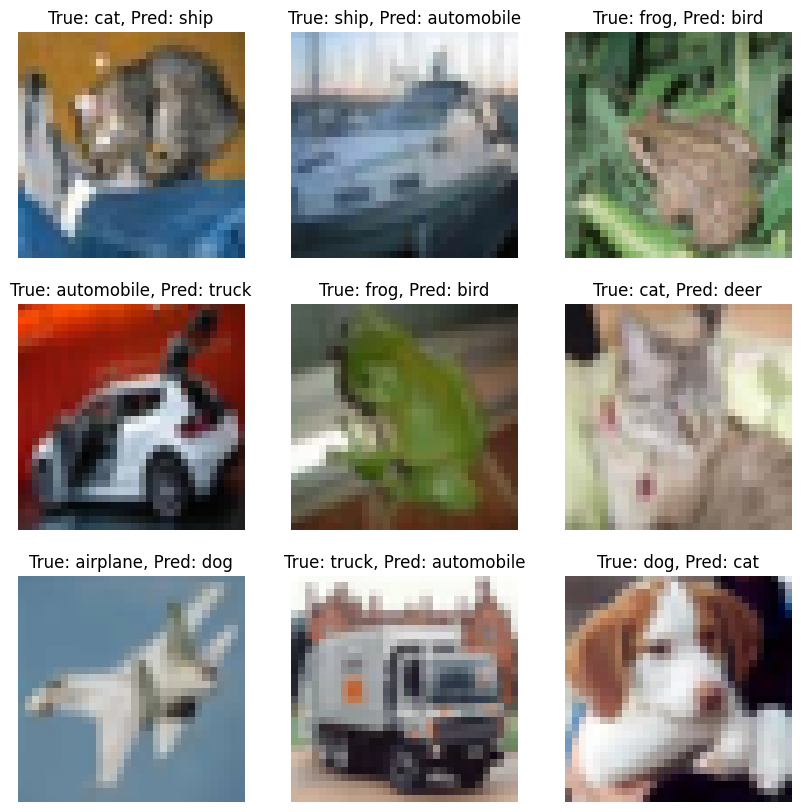

In [ ]:
# Função para visualizar previsões incorretas
def plot_misclassified_images(images, true_labels, predicted_labels, class_names):
    misclassified = true_labels != predicted_labels
    misclassified_images = images[misclassified]
    true_labels = true_labels[misclassified]
    predicted_labels = predicted_labels[misclassified]

    plt.figure(figsize=(10, 10))
    for i in range(min(9, len(misclassified_images))):  # plota até 9 imagens incorretas ou menos se houver menos de 9
        plt.subplot(3, 3, i + 1)
        plt.imshow(misclassified_images[i])
        true_class_name = class_names[true_labels[i]]
        predicted_class_name = class_names[predicted_labels[i]]
        plt.title(f"True: {true_class_name}, Pred: {predicted_class_name}")
        plt.axis("off")
    plt.show()

# Exemplo de uso
# true_classes e predicted_classes são arrays com os índices das classes verdadeiras e previstas, respectivamente
# X_test são as imagens de teste
plot_misclassified_images(X_test, true_classes, predicted_classes, class_names)

## Predição de outras imagens

In [ ]:
# Lista de URLs de imagens de teste
image_urls = [
    'https://marvel-b1-cdn.bc0a.com/f00000000295579/www.tecequipment.com/app/uploads/2020/10/Volvo-VNR-Day-cab.jpg',
    'https://www.alleycat.org/wp-content/uploads/2019/03/FELV-cat.jpg'
]

In [ ]:
def load_and_preprocess_image(url):
    try:
        # Baixa a imagem da URL
        response = requests.get(url)
        response.raise_for_status()  # Verifica se a requisição foi bem-sucedida
        img = Image.open(BytesIO(response.content))

        # Redimensiona a imagem para 32x32 pixels
        img = img.resize((32, 32))

        # Converte a imagem para um array e normaliza os valores
        img_array = image.img_to_array(img)
        img_array = img_array / 255.0  # Normaliza a imagem

        # Expande as dimensões para se ajustar ao formato esperado pelo modelo
        img_array = np.expand_dims(img_array, axis=0)

        return img_array
    except (requests.HTTPError, UnidentifiedImageError) as e:
        print(f"Error loading image from {url}: {e}")
        return None

# Processa e faz predições nas imagens
for url in image_urls:
    img_array = load_and_preprocess_image(url)
    if img_array is not None:
        predictions = model.predict(img_array)  # Pode retornar uma lista de arrays se houver múltiplas saídas
        main_prediction = predictions[0]  # Supondo que a primeira saída é a principal
        predicted_class = np.argmax(main_prediction, axis=1)
        print(f"Predicted class for {url}: {class_names[predicted_class[0]]}")
    else:
        print(f"Skipping image from {url} due to loading error.")

1/1 [==============================] - 1s 836ms/step
Predicted class for https://marvel-b1-cdn.bc0a.com/f00000000295579/www.tecequipment.com/app/uploads/2020/10/Volvo-VNR-Day-cab.jpg: truck
1/1 [==============================] - 0s 75ms/step
Predicted class for https://www.alleycat.org/wp-content/uploads/2019/03/FELV-cat.jpg: bird
